In [1]:
import configparser
import glob
import os

import pandas as pd
import pickle
import sktensor

from eval_tensor import consistent_name_d

In [2]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
height = 6
pylab.rcParams['figure.figsize'] = (2*height, height)
matplotlib.rcParams.update({'font.size': 14})

In [4]:
import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

In [5]:
if not os.path.exists('cp_orth.py'):
    wget.download('http://web.stanford.edu/~vsharan/cp_orth.py')
#from cp_orth import orth_als

In [6]:
config = configparser.ConfigParser()
config.read('config.ini')
projdir = config['DEFAULT']['ProjectDirectory']

In [7]:
def get_df(part=''):
    tabular = []
    mx = []
    for filen in glob.glob(os.path.join(projdir, f'../pyconll/tensor/{part}/ktensor_*.pkl')):
        weight, cutoff, dim = os.path.splitext(os.path.basename(filen))[0].rsplit('_', 2)
        _, weight = weight.split('_', 1)
        cutoff, dim = map(int, (cutoff, dim))
        ktensor, fit, n_iterations, exectimes = pickle.load(open(filen, mode='rb'))
        
        tabular.append((#consistent_name_d[
            weight, cutoff, dim, ktensor.shape, fit, n_iterations, sum(exectimes)))
    df = pd.DataFrame(tabular, columns=['weight', 'cutoff', 'dim', 'shape', 'fit', 'n_iterations', 'time'])
    df['hours'] = df.time/60/60
    return df

In [8]:
#!python3 -m pip install pip install scikit-tensor-py3

In [9]:
df = get_df('')

In [10]:
df.sort_values('time', inplace=True)

In [11]:
df['minute'] = 60 * df.hours

In [12]:
df[df.hours<1]

,weight,cutoff,dim,shape,fit,n_iterations,time,hours,minute
72,log_freq,100000,1,"(88, 262, 105)",0.361449,8,0.017011,0.000005,0.000284
9,log_freq,100000,2,"(88, 262, 105)",0.393160,10,0.437685,0.000122,0.007295
7,log_freq,10000,1,"(1154, 1626, 1115)",0.226075,11,1.864757,0.000518,0.031079
69,log_freq,10000,2,"(1154, 1626, 1115)",0.285332,9,1.958519,0.000544,0.032642
67,pmi,1000,1,"(7972, 7151, 6144)",0.020314,8,3.118643,0.000866,0.051977
19,log_freq,1000,2,"(7972, 7151, 6144)",0.248081,10,5.038611,0.001400,0.083977
64,log_freq,1000,1,"(7972, 7151, 6144)",0.143649,23,5.238842,0.001455,0.087314
63,freq,200,1,"(24388, 16846, 15697)",0.655250,1,5.331170,0.001481,0.088853
2,log_freq,100,2,"(34903, 22661, 21963)",0.258490,10,33.115513,0.009199,0.551925
47,freq,10000,32,"(1153, 1625, 1114)",0.988429,60,84.120313,0.023367,1.402005


In [13]:
df.groupby(['weight']).size().sort_values(ascending=False).head()

weight
log_freq     14
iact_sali     8
pmi           7
iact_info     7
salience      6
dtype: int64

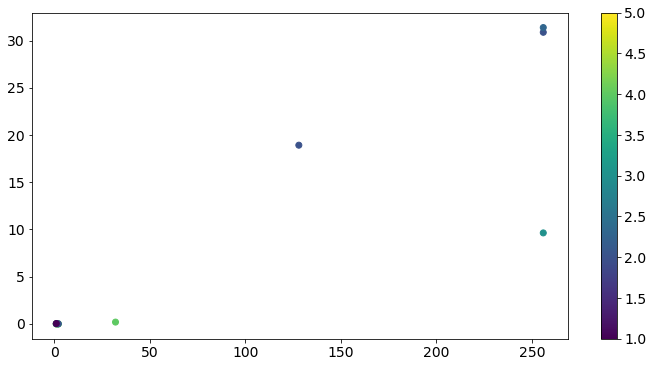

In [24]:
df_ = df[(df.weight=='log_freq')]
plt.scatter(df_.dim, df_.hours, c=np.log10(df_.cutoff))#, norm=matplotlib.colors.LogNorm())
#plt.yscale('log')
#plt.xscale('log', basex=2)
#plt.yscale('log')
plt.colorbar()

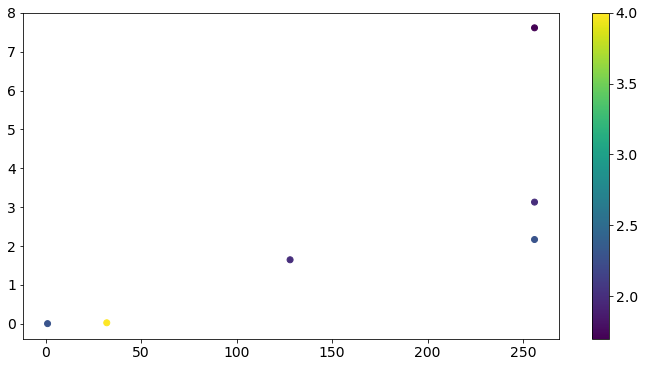

In [27]:
df_ = df[df.weight=='freq']
plt.scatter(df_.dim, df_.hours, c=np.log10(df_.cutoff))
#plt.yscale('log')
#plt.xscale('log', basex=2)
plt.colorbar()

In [83]:
df.groupby(['cutoff']).size().sort_values(ascending=False).head()

cutoff
100     22
1000    14
200     11
50       9
500      8
dtype: int64

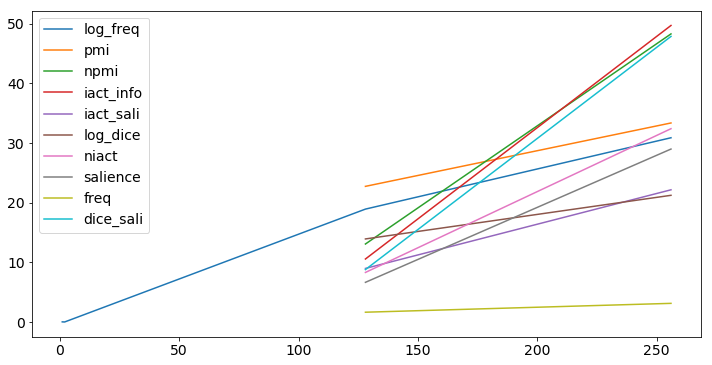

In [33]:
df_ = df[df.cutoff==100].sort_values('dim')
for weight in df_.weight.unique():
    df_w = df_[df_.weight==weight]#]
    plt.plot(df_w.dim, df_w.hours)
#plt.yscale('log')
#plt.xscale('log', base=2)
plt.legend(df_.weight.unique())

In [120]:
df.groupby(['dim']).size().sort_values(ascending=False).head()

dim
256    46
128    10
1       7
2       4
32      3
dtype: int64

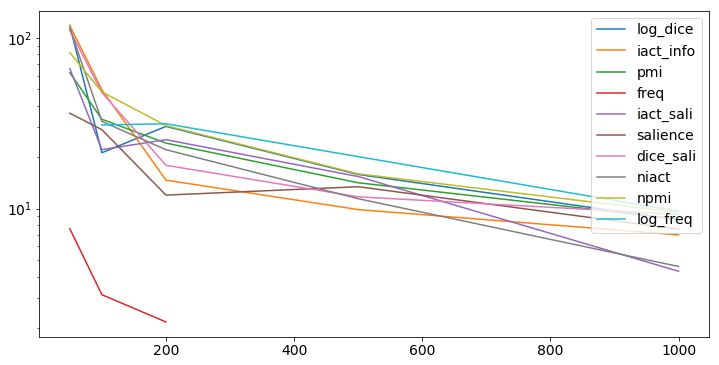

In [32]:
df_ = df[df.dim==256].sort_values('cutoff')
for weight in df_.weight.unique():
    df_w = df_[df_.weight==weight]#]
    plt.plot(df_w.cutoff, df_w.hours)
plt.yscale('log')
#plt.xscale('log')#, base=10)
plt.legend(df_.weight.unique())